# Lab 2.01 - Australian Athletes (ais)

Import all necessary Python libraries and load the AIS dataset from lab exercise 1.01. Also include the code for setting the index and conversion to categorical variables!

In [2]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
import altair as alt                                # Alternative visualisation system

ais = pd.read_csv('../data/ais.csv')
ais.head()
ais.set_index(['id'])
ais.sex = ais.sex.astype('category')
ais.sport = ais.sport.astype('category')

In [3]:
#ais.dtypes
#ais.sport.value_counts()
ais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      202 non-null    int64   
 1   rcc     202 non-null    float64 
 2   wcc     202 non-null    float64 
 3   hc      202 non-null    float64 
 4   hg      202 non-null    float64 
 5   ferr    202 non-null    int64   
 6   bmi     202 non-null    float64 
 7   ssf     202 non-null    float64 
 8   pcBfat  202 non-null    float64 
 9   lbm     202 non-null    float64 
 10  ht      202 non-null    float64 
 11  wt      202 non-null    float64 
 12  sex     202 non-null    category
 13  sport   202 non-null    category
dtypes: category(2), float64(10), int64(2)
memory usage: 19.9 KB


Use an appropriate chart type to visualise the following variables. Are several chart types suitable? Make one of each! Note how some graphs nevertheless give a better insight into the data than other types of graphs.

- `sex`
- `sport`
- `ht` (show this also divided by `sex` and by `sport`.)

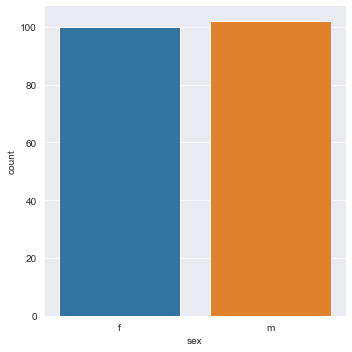

In [4]:
sns.catplot(data = ais, kind = "count", x = "sex");

<AxesSubplot:xlabel='sex', ylabel='count'>

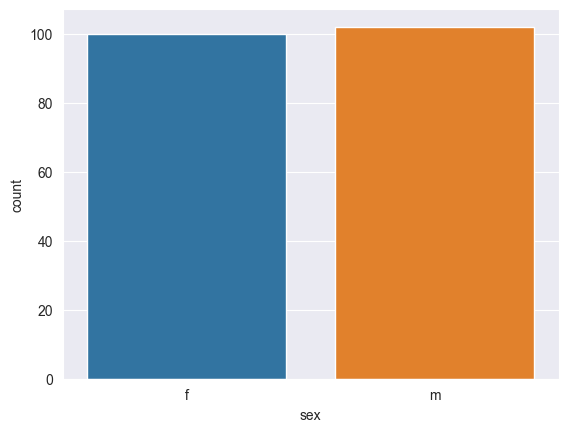

In [5]:
sns.countplot(data=ais, x='sex')

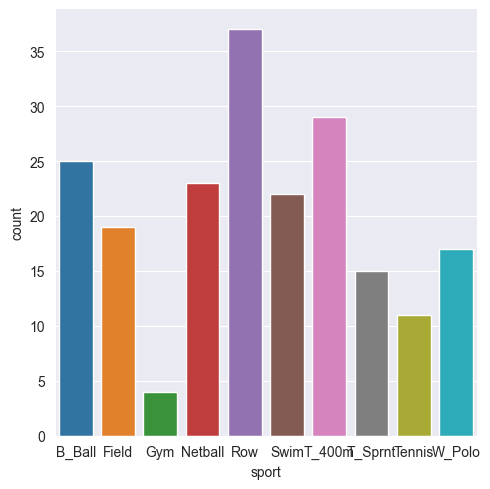

In [6]:
sns.catplot(data = ais, kind = "count", x = "sport");

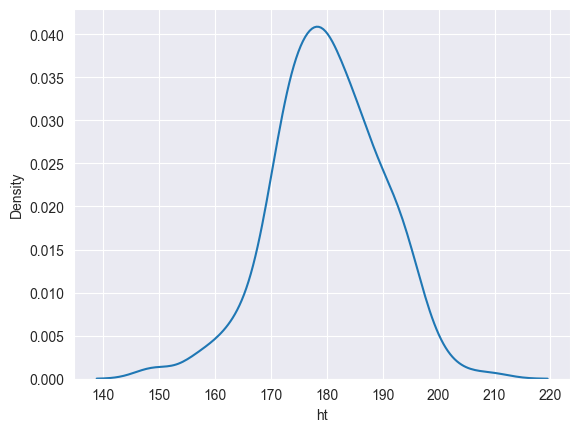

In [7]:
sns.kdeplot(x = ais["ht"]);

<AxesSubplot:>

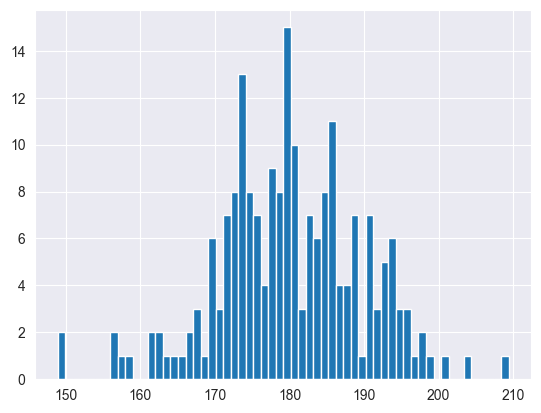

In [8]:
ais["ht"].hist(bins=60)

<AxesSubplot:xlabel='sex', ylabel='ht'>

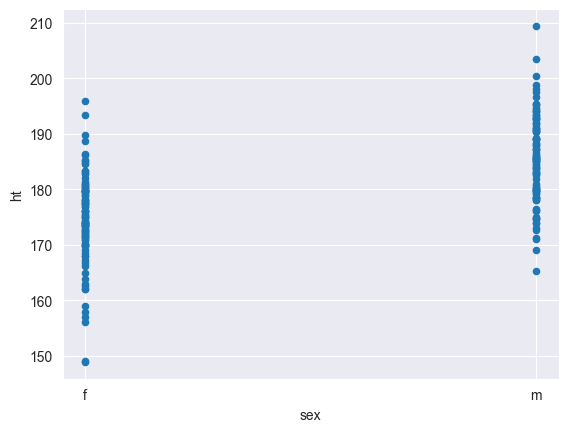

In [9]:
ais.plot(kind='scatter', x='sex',y='ht')

<AxesSubplot:xlabel='sex', ylabel='ht'>

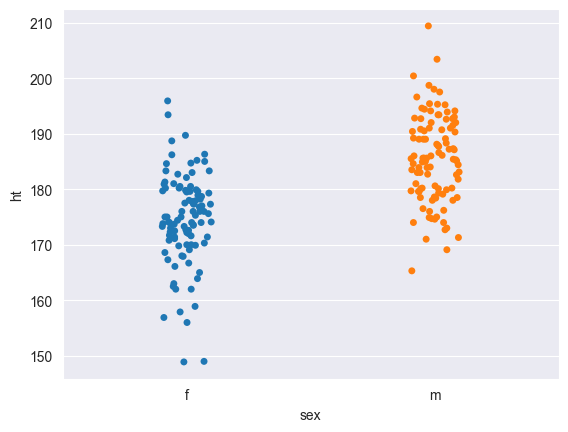

In [10]:
sns.stripplot(x='sex',y='ht', data=ais)

Select the following subsets from the dataset and calculate for each the appropriate measures of central tendency (and, when possible, dispersion) of the variables `ht` and `sex`:

1. the rowers
2. the rowers, netball and tennis players together
3. the female basketball players and rowers together

In [11]:
rowers = ais[ais["sport"]=="Row"]
# Centrality and dispersion deasures
# Mean, standard deviation & friends
print(f"Mean:                {rowers['ht'].mean()}")
print(f"Standard deviation:  {rowers['ht'].std()}") # Pay attention: n-1 in the denominator
print(f"Variance:            {rowers['ht'].var()}") # Pay attention: n-1 in the denominator
print(f"Skewness:            {rowers['ht'].skew()}")
print(f"Kurtosis:            {rowers['ht'].kurtosis()}")

# Median & co
print(f"Minimum:   {rowers['ht'].min()}")
print(f"Median:    {rowers['ht'].median()}")
print(f"Maximum:   {rowers['ht'].max()}")
percentiles = [0.0, 0.25, 0.5, 0.75, 1.0]
print("Percentiles", percentiles, "\n", rowers['ht'].quantile(percentiles))
print("Inter Quartile Range:", rowers['ht'].quantile(.75) - rowers['ht'].quantile(.25))
print(f"Range :    {rowers['ht'].max() - rowers['ht'].min()}")

Mean:                182.3756756756757
Standard deviation:  7.798376091832815
Variance:            60.81466966966965
Skewness:            -0.9519631183854053
Kurtosis:            2.9203632716558277
Minimum:   156.0
Median:    181.8
Maximum:   198.0
Percentiles [0.0, 0.25, 0.5, 0.75, 1.0] 
 0.00    156.0
0.25    179.3
0.50    181.8
0.75    186.3
1.00    198.0
Name: ht, dtype: float64
Inter Quartile Range: 7.0
Range :    42.0


In [12]:
rowers = ais[(ais["sport"]=="Row") | (ais["sport"]=="Netball") | (ais["sport"]=="Tennis")]
# Centrality and dispersion deasures
# Mean, standard deviation & friends
print(f"Mean:                {rowers['ht'].mean()}")
print(f"Standard deviation:  {rowers['ht'].std()}") # Pay attention: n-1 in the denominator
print(f"Variance:            {rowers['ht'].var()}") # Pay attention: n-1 in the denominator
print(f"Skewness:            {rowers['ht'].skew()}")
print(f"Kurtosis:            {rowers['ht'].kurtosis()}")

# Median & co
print(f"Minimum:   {rowers['ht'].min()}")
print(f"Median:    {rowers['ht'].median()}")
print(f"Maximum:   {rowers['ht'].max()}")
percentiles = [0.0, 0.25, 0.5, 0.75, 1.0]
print("Percentiles", percentiles, "\n", rowers['ht'].quantile(percentiles))
print("Inter Quartile Range:", rowers['ht'].quantile(.75) - rowers['ht'].quantile(.25))
print(f"Range :    {rowers['ht'].max() - rowers['ht'].min()}")

Mean:                179.0661971830986
Standard deviation:  7.936370952987299
Variance:            62.98598390342053
Skewness:            -0.3486616428809658
Kurtosis:            0.8305138548642468
Minimum:   156.0
Median:    179.5
Maximum:   198.0
Percentiles [0.0, 0.25, 0.5, 0.75, 1.0] 
 0.00    156.00
0.25    174.25
0.50    179.50
0.75    183.40
1.00    198.00
Name: ht, dtype: float64
Inter Quartile Range: 9.150000000000006
Range :    42.0


In [13]:
rowers = ais.query("((sport=='B_Ball') & (sex=='f')) | ((sport=='Row') & (sex=='f')) |((sport=='Tennis') & (sex=='f'))")
# Centrality and dispersion deasures
# Mean, standard deviation & friends
print(f"Mean:                {rowers['ht'].mean()}")
print(f"Standard deviation:  {rowers['ht'].std()}") # Pay attention: n-1 in the denominator
print(f"Variance:            {rowers['ht'].var()}") # Pay attention: n-1 in the denominator
print(f"Skewness:            {rowers['ht'].skew()}")
print(f"Kurtosis:            {rowers['ht'].kurtosis()}")

# Median & co
print(f"Minimum:   {rowers['ht'].min()}")
print(f"Median:    {rowers['ht'].median()}")
print(f"Maximum:   {rowers['ht'].max()}")
percentiles = [0.0, 0.25, 0.5, 0.75, 1.0]
print("Percentiles", percentiles, "\n", rowers['ht'].quantile(percentiles))
print("Inter Quartile Range:", rowers['ht'].quantile(.75) - rowers['ht'].quantile(.25))
print(f"Range :    {rowers['ht'].max() - rowers['ht'].min()}")

Mean:                178.2
Standard deviation:  8.271638289964086
Variance:            68.41999999999999
Skewness:            -0.5926528950340312
Kurtosis:            1.062819867967257
Minimum:   156.0
Median:    179.4
Maximum:   195.9
Percentiles [0.0, 0.25, 0.5, 0.75, 1.0] 
 0.00    156.00
0.25    174.25
0.50    179.40
0.75    183.00
1.00    195.90
Name: ht, dtype: float64
Inter Quartile Range: 8.75
Range :    39.900000000000006


## Check your answers

As a check, here are the results of the last question. First the frequencies and mode of the variable `sex`:

|           | Selection 1 | Selection 2 | Selection 3 |
| :-------- | :---------- | :---------- | :---------- |
| **f**     | 22          | 52          | 35          |
| **m**     | 15          | 19          | 0           |
| **mode**  | f           | f           | f           |

Then the relevant measures for central tendency and dispersion for `ht` (max. 3 decimal places):

| Statistic  | Selection 1 | Selection 2 | Selection 3 |
| :--------- | :---------- | :---------- | :---------- |
| mean       | 182.376     | 179.066     | 180.126     |
| stdev      | 7.798       | 7.936       | 7.144       |
| min        | 156         | 156         | 156         |
| Q1         | 179.3       | 174.25      | 177.4       |
| median     | 181.8       | 179.5       | 179.7       |
| Q3         | 186.3       | 183.4       | 184.65      |
| max        | 198         | 198         | 195.9       |
| IQR        | 7           | 9.15        | 7.250       |